<div style="background-color:rgba(3, 169, 243, 0.4); padding:10pt" >    


# **Traitement d'images [3EIB2]**
&mdash; **_<span style="color:gray">Alain Lebret_ (_alain.lebret@ensicaen.fr_)</span>** &mdash;

## 1. Premiers pas

- _Introduction à [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb)_
- _Introduction à [OpenCV](https://opencv.org/)_
</div>

## Dépendances

> Un certain nombre de bibliothèques Python utiles au traitement des images doivent être préalablement chargées : _NumPy_, _Scikit-image_, et _Matplotlib_ (éventuellement aussi _Pandas_, _CV2_ et _PIL_).

*   [NumPy](https://www.numpy.org/) est une bibliothèque de calcul matriciel utilisée pour ses fonctions d'algèbre linéaire, de transformation de Fourier et de gestion des nombres aléatoires.
*   [Scikit-image](https://scikit-image.org/) est la bibliothèque de traitement d'images que nous utilisons en grande partie dans ces TP.
*   [Matplotlib](https://matplotlib.org/) est une bibliothèque de gestion des figures.

D'autres bibliothèques pourront être utiles :
*   [cv2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) (OpenCV) est une bibliothèque pour les tâches en vision par ordinateur. Écrite nativement en C++, elle est aussi utilisable par l'intermédiaire des langages Java ou Python. Nous l'utiliserons éventuellement pour quelques opérations.
*   [Pandas](https://pandas.pydata.org/) est une bibliothèque de manipulation et d'analyse des données.
*   [PIL](https://pillow.readthedocs.io/en/stable/) est une bibliothèque comparable à Scikit-image.


Les bibliothèques Scikit-image, CV2 ou PIL peuvent importer ou exporter plusieurs formats d'image que vous pourrez rencontrer tout au long de ce tutoriel :

-   BMP (Microsoft Windows Bitmap)
-   GIF (*Graphics Interchange Files*)
-   HDF (*Hierarchical Data Format*)
-   JPEG (*Joint Photographic Experts Group*)
-   PCX (*Paintbrush*)
-   PNG (*Portable Network Graphics*)
-   TIFF (*Tagged Image File Format*)
-   XWD (*X Window Dump*)
-   etc.

Remarque : Si vous préférez utiliser [Google Colab](https://colab.research.google.com) plutôt que d'installer en local [Jupyter-Lab](https://jupyter.org/install), vous devez posséder un compte Google et mettre en oeuvre votre accès à votre disque _Google Drive_. En supposant que vos images sont stockées dans le dossier "resources" à la racine de votre disque _Google Drive_, vous devrez tout d'abord monter celui-ci de la manière suivante :

```python
from google.colab import drive
drive.mount('/content/drive')
```

À partir de là, vos images seront accessibles depuis le chemin : `"drive/My Drive/ressources/"`.



In [9]:
#
# Loads required libraries 
#
import cv2 as cv          # OpenCV
import skimage            # scikit-image
from skimage import data  # some images to use
from skimage import io    # open, write, etc. image files
from skimage import color # conversion between color spaces
from matplotlib import pyplot as plt

#
# Uncomments the lines below if using Google Colab
#
#from google.colab import drive
#from google.colab.patches import cv2_imshow

In [4]:
root_path = './ressources'
smaller = root_path + '/256x256'
medium = root_path + '/512x512'
various = root_path + '/divers'

### 1.1. Introduction

#### 1.1.1. Lire et afficher des images

La lecture des fichiers "image" est réalisée à l'aide de la fonction `imread()` (module "io" de la bibliothèque _scikit-image_). La fonction prend comme paramètre le chemin d'une image stockée localement ou encore son URL si celle-ci est accessible sur un réseau.
Le type de données retourné par `imread()` est une matrice qui dépend du type de l'image (images en niveaux de gris, en couleurs, etc.). Par exemple, on pourra lire le fichier local "leafs.jpg" qui se trouve dans le sous-dossier "divers" du dossier "ressources" en entrant :

```python
leafs = io.imread(various + '/leafs.jpg')
```

qui va stocker les pixels de l'image "leafs.jpg" dans une matrice de 1350 x 900 x 3 nommée `leafs`.

À présent, l'image peut être visualisée à l'aide de la fonction `imshow()` (module "pyplot" de la bibliothèque "matplotlib"),
par exemple, en entrant :

```python
fd1 = plt.figure(1)
plt.title("Leafs - original color image")
plt.imshow(leafs)
```

1) Read and display a local image

Image coding:  uint8
Image size (height, width, channels):  (900, 1350, 3)




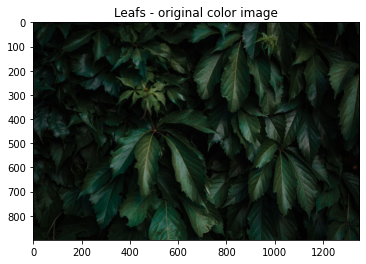

In [5]:
print('1) Read and display a local image\n')
leafs = io.imread(various + '/leafs.jpg')

print('Image coding: ', leafs.dtype)
print('Image size (height, width, channels): ', leafs.shape)

# Prepare the figure to be displayed
fd1 = plt.figure(1)
plt.imshow(leafs)
plt.title("Leafs - original color image")
print('\n')

Il est aussi possible de lire et d'afficher des images distantes ou internes (module "data" de la bibliothèque _scikit-image_) : 

2) Read and display a distant image

Image coding:  uint8
Image size (height, width, channels):  (516, 466, 4)


3) Read and display a scikit-image inner image

Image coding:  uint8
Image size (height, width, channels):  (512, 512, 3)




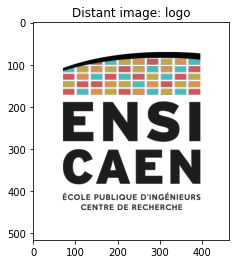

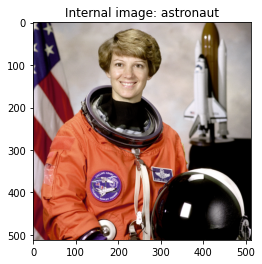

In [6]:
#
# Load and display a distant image
#
print('2) Read and display a distant image\n')
url = 'https://www.ensicaen.fr/wp-content/uploads/2017/03/LogoENSICAEN_institutionnel_couleurs.png'
logo = io.imread(url) 

print('Image coding: ', logo.dtype)
print('Image size (height, width, channels): ', logo.shape)

fd2 = plt.figure(2)
plt.title("Distant image: logo")
plt.imshow(logo)
print('\n')

#
# Load and display a library inner image
#
print('3) Read and display a scikit-image inner image\n')
astronaut = data.astronaut()

print('Image coding: ', astronaut.dtype)
print('Image size (height, width, channels): ', astronaut.shape)

fd3 = plt.figure(3)
plt.title("Internal image: astronaut")
plt.imshow(astronaut)
print('\n')


<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation n° 1.1**

1. Chargez et affichez une image locale de votre choix.
2. Chargez et affichez une image du Web de votre choix.
3. Chargez et affichez l'image interne "coins" qui contient des pièces grecques retrouvées à Pompéi (obtenue en utilisant la fonction "`coins()`" du module "data" - bibliothèque _scikit-image_).
4. Affichez les propriétés des 3 images.

---
    
</div>

In [11]:
#
# Mettez votre code ici
#


#### 1.1.2. Enregistrer une image

L'enregistrement d'une image dans un fichier est réalisé à l'aide de la fonction `imsave()` (module "io" de la bibliothèque _scikit-image_). Par exemple, pour enregistrer localement au format "PNG" l'image "astronaut" rencontrée précédemment, on entrera l'instruction :

```python
io.imsave('astronaut.png', astronaut);
```

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation n° 1.2**

1. Enregistrez localement l'image "coins" rencontrée précédemment.

---
    
</div>

In [13]:
#
# Mettez votre code ici
#


#### 1.1.3. Afficher plusieurs images sur une même figure

Il peut être intéressant d'afficher plusieurs images sur une même figure. On utilisera pour cela la fonction `add_subplot()` (module "pyplot" de la bibliothèque _Matplotlib_) :

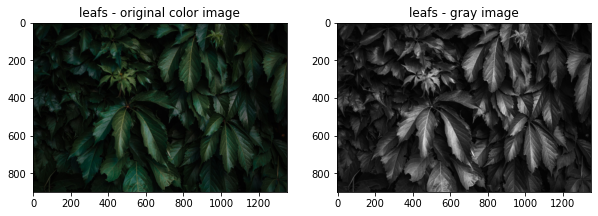

In [7]:
figure = plt.figure(figsize=(10, 10))

figure.add_subplot(1, 2, 1)
plt.title("leafs - original color image")
plt.imshow(leafs)

figure.add_subplot(1, 2, 2)
plt.title("leafs - gray image")
plt.imshow(color.rgb2gray(leafs), cmap='gray')

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation n° 1.3**

Placez l'ensemble des images que vous avez chargées précédemment (3 en principe), ainsi que l'image "astronaut" sur une même figure (2 sur une première ligne et les deux autres sur la suivante). Vous donnerez des titres à chacune. 

---
    
</div>

In [14]:
#
# Mettez votre code ici
#


### 1.2. Images en niveaux de gris et en couleurs

#### 1.2.1. Images en niveaux de gris
`"data.coins()"` retourne une image en niveaux de gris. Une image en niveaux de gris est stockée dans une matrice à 2 dimensions (largeur x hauteur) dont les valeurs représentent l'intensité de chaque pixel. Cette intensité est comprise dans l'intervalle \[0, 255\] pour les images 8-bits comme la précédente, ou \[0, 65536\] pour les images 16-bits  telles que les images médicales au format DICOM. 

#### 1.2.2. Images en couleurs

L'image retournée par `"data.astronaut()"` est quant à elle une image couleur. Ce type d'image est stockée dans des matrices à 3 (ou 4) dimensions (largeur x hauteur x 3), permettant de stocker l'intensité de chaque pixel (comprise dans l'intervalle \[0, 255\]) et ce pour chacun des canaux primaires rouge, vert et bleu (RVB ou RGB en anglais).

L'extraction des trois canaux peut se faire facilement de deux manières:

1. En utilisant les propriétés de Python quant à la manipulation matricielle  

```python
red = astronaut[:,:,2]
```

Une fois les opérations réalisées sur chaque canaux, il est possible de les réassembler :

```python
np.zeros(astronaut.shape) # create a black color image  
output[:,:,2] = red
```

2. À l'aide de la fonction `split()` de la bibliothèque cv2 :

```python
blue, green, red = cv.split(astronaut)
```

Une fois les opérations réalisées sur chaque canaux, il est possible de les réassembler à l'aide de la fonction `merge()` :

```python
merged = cv.merge([blue, green, red])
```



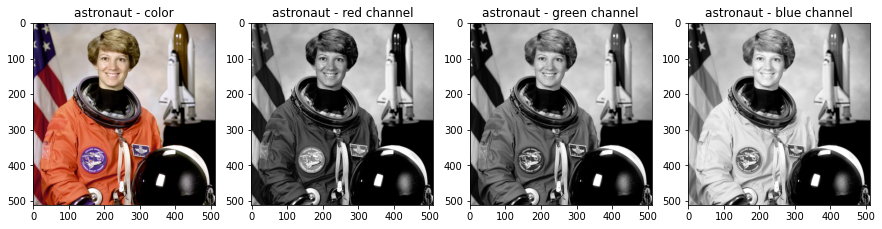

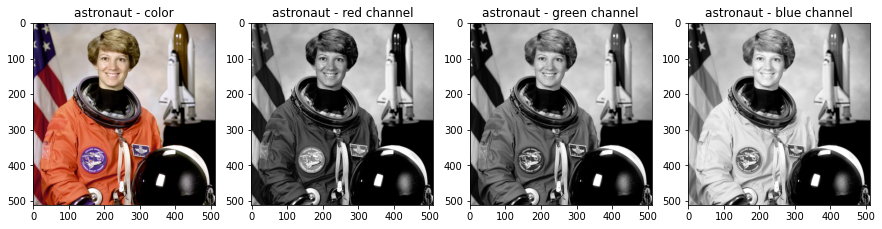

In [10]:
#
# Split color image components using 
#
blue = astronaut[:,:,0]
green = astronaut[:,:,1]
red = astronaut[:,:,2]
figure = plt.figure(figsize=(15, 15))
figure.add_subplot(1, 4, 1)
plt.title("astronaut - color")
plt.imshow(astronaut, cmap='gray'); # Try without cmap='gray' ;-)
figure.add_subplot(1, 4, 2)
plt.title("astronaut - red channel")
plt.imshow(red, cmap='gray'); 
figure.add_subplot(1, 4, 3)
plt.title("astronaut - green channel")
plt.imshow(green, cmap='gray');
figure.add_subplot(1, 4, 4)
plt.title("astronaut - blue channel")
plt.imshow(blue, cmap='gray');

#
# Split color image components using the OpenCV "split" function
#
blue, green, red = cv.split(astronaut)

figure = plt.figure(figsize=(15, 15))
figure.add_subplot(1, 4, 1)
plt.title("astronaut - color")
plt.imshow(astronaut, cmap='gray'); 
figure.add_subplot(1, 4, 2)
plt.title("astronaut - red channel")
plt.imshow(red, cmap='gray'); 
figure.add_subplot(1, 4, 3)
plt.title("astronaut - green channel")
plt.imshow(green, cmap='gray');
figure.add_subplot(1, 4, 4)
plt.title("astronaut - blue channel")
plt.imshow(blue, cmap='gray');

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation n° 1.4**

Récupérez avec les deux méthodes précédentes les canaux rouge, vert et bleu de l'image "rondelles.bmp", puis affichez-les dans une même figure avec des titres. 

---
    
</div>

In [16]:
#
# Mettez votre code ici
#


### 1.3. Espaces couleur

Passer d'un espace de couleur à un autre permet parfois de mettre en évidence certains objets dans une image, et ainsi faciliter leur extraction. Le module "color" de la bibliothèque _scikit-image_ contient un certain nombre de fonctions permettant le passage d'un espace couleur à un autre. La fonction `rgb2hsv()` utilisée dans l'exemple suivant permet de passer de l'espace RGB à l'espace HSV (Hue-Saturation-Value).

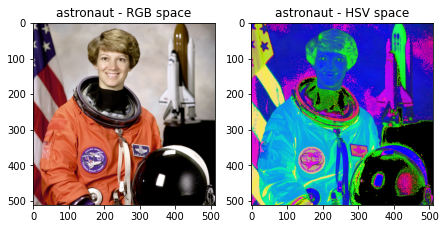

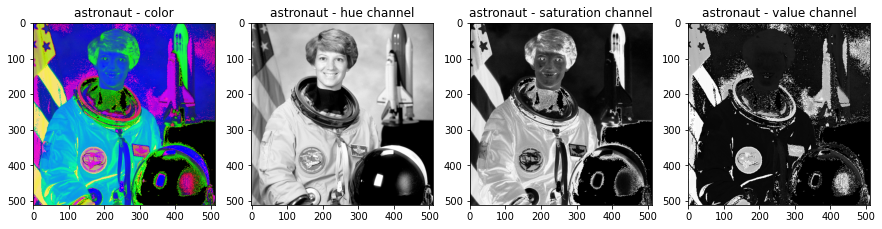

In [11]:
astronaut_hsv = color.rgb2hsv(astronaut)

figure = plt.figure(figsize=(15, 15))
figure.add_subplot(1, 4, 1)
plt.title("astronaut - RGB space")
plt.imshow(astronaut, cmap='gray'); 
figure.add_subplot(1, 4, 2)
plt.title("astronaut - HSV space")
plt.imshow(astronaut_hsv); 

blue, green, red = cv.split(astronaut_hsv)

figure = plt.figure(figsize=(15, 15))
figure.add_subplot(1, 4, 1)
plt.title("astronaut - color")
plt.imshow(astronaut_hsv, cmap='gray'); 
figure.add_subplot(1, 4, 2)
plt.title("astronaut - hue channel")
plt.imshow(red, cmap='gray'); 
figure.add_subplot(1, 4, 3)
plt.title("astronaut - saturation channel")
plt.imshow(green, cmap='gray');
figure.add_subplot(1, 4, 4)
plt.title("astronaut - value channel")
plt.imshow(blue, cmap='gray');

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation n° 1.5**

1. Pour l'image "rondelles.bmp", changez l'espace de couleur RGB pour l'espace HSV. Affichez et titrez les deux images sur une même figure.
2. Décomposez et affichez les canaux H, S et V sur une même figure.
3. Un des canaux donne-t-il plus d'informations que les autres ?
4. Réitérez en passant de l'espace RGB à l'espace YCbCr à l'aide de la fonction `rgb2ycbcr()`. 
5. Comparez les résultats pour ces trois espaces. 

---
    
</div>

In [17]:
#
# Mettez votre code ici
#
